# Creating target list

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord

In [2]:
%matplotlib notebook

In [3]:
# NASA-Sloan Atlas v0.1.2 (out to z < 0.055)
data = Table.read('../../../dusty-halos/data/nsa_v0_1_2.fits')

In [55]:
nsa = data[['NSAID','RA', 'DEC', 'Z', 'IALFALFA', 'MAG']].to_pandas()

nsa.set_index('NSAID', inplace=True)

In [20]:
nsa.sample(3)

,RA,DEC,Z,IALFALFA,MAG
NSAID,,,,,
11786,61.805229,-5.437089,0.038045,-1,16.024368
139999,174.867034,26.489120,0.023046,-1,18.000000
56691,220.114253,36.418868,0.028363,-1,18.149868


## NSA + 2011 ALFALFA

<IPython.core.display.Javascript object>


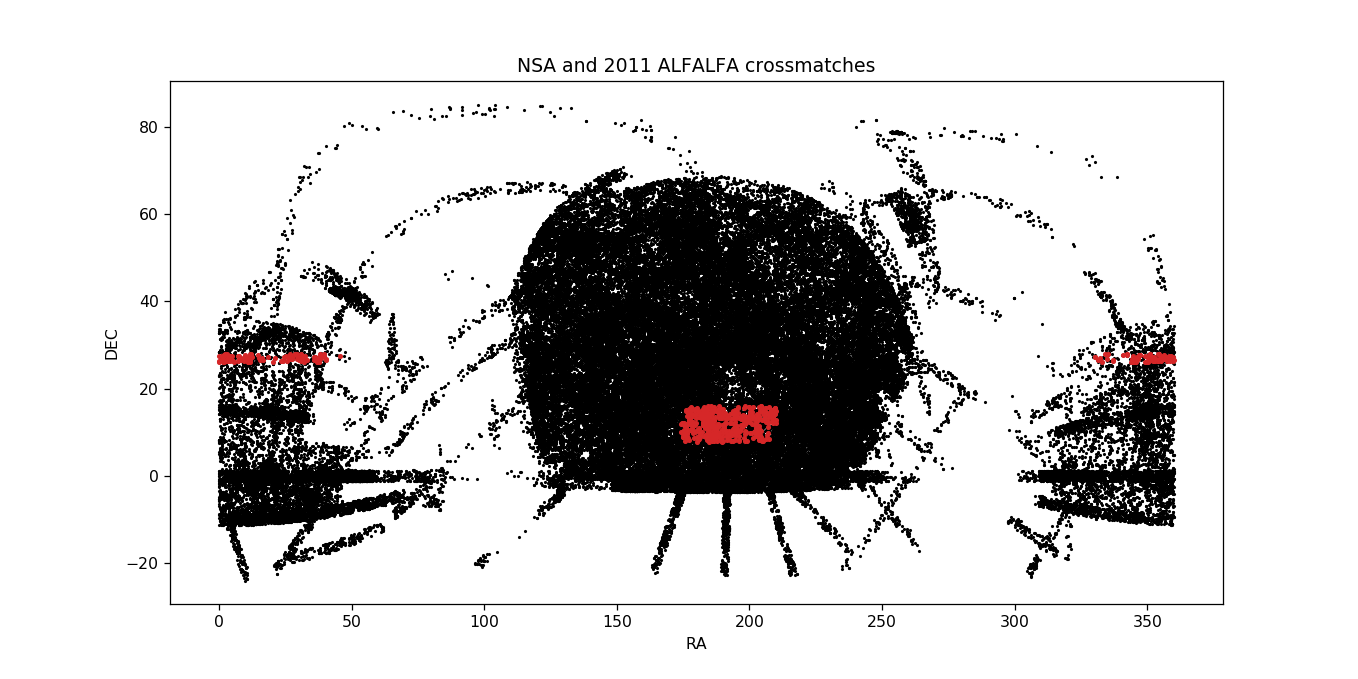

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.set_title('NSA and 2011 ALFALFA crossmatches')
nsa[nsa.IALFALFA == -1].plot.scatter('RA', 'DEC', c='k', s=1, ax=ax)
nsa[nsa.IALFALFA != -1].plot.scatter('RA', 'DEC', c='C3', s=5, ax=ax)

Ah yeah, this is clearly just the 2011 ALFALFA sample. Things should be expanded now...

## NSA + ALFALFA 100% sample

In [8]:
alf = pd.read_csv('../../../alfalfa-convnets/data/a100.code12.tab1.180315.csv')
alf.sample(3)

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
17335,224623,........,185.19833,11.87722,185.19791,11.88694,11647,371,7,137,1.45,0.10,8.5,1.97,171.1,2.0,10.00,0.05,1
31358,336569,........,358.84250,12.75111,358.84250,12.75167,6557,45,15,182,0.74,0.06,9.3,2.60,88.5,2.3,9.14,0.06,1
20397,8450,072-076.,201.75958,10.05611,201.75500,10.05611,1049,52,3,282,3.24,0.06,40.2,2.48,16.3,2.4,8.31,0.13,1


<IPython.core.display.Javascript object>


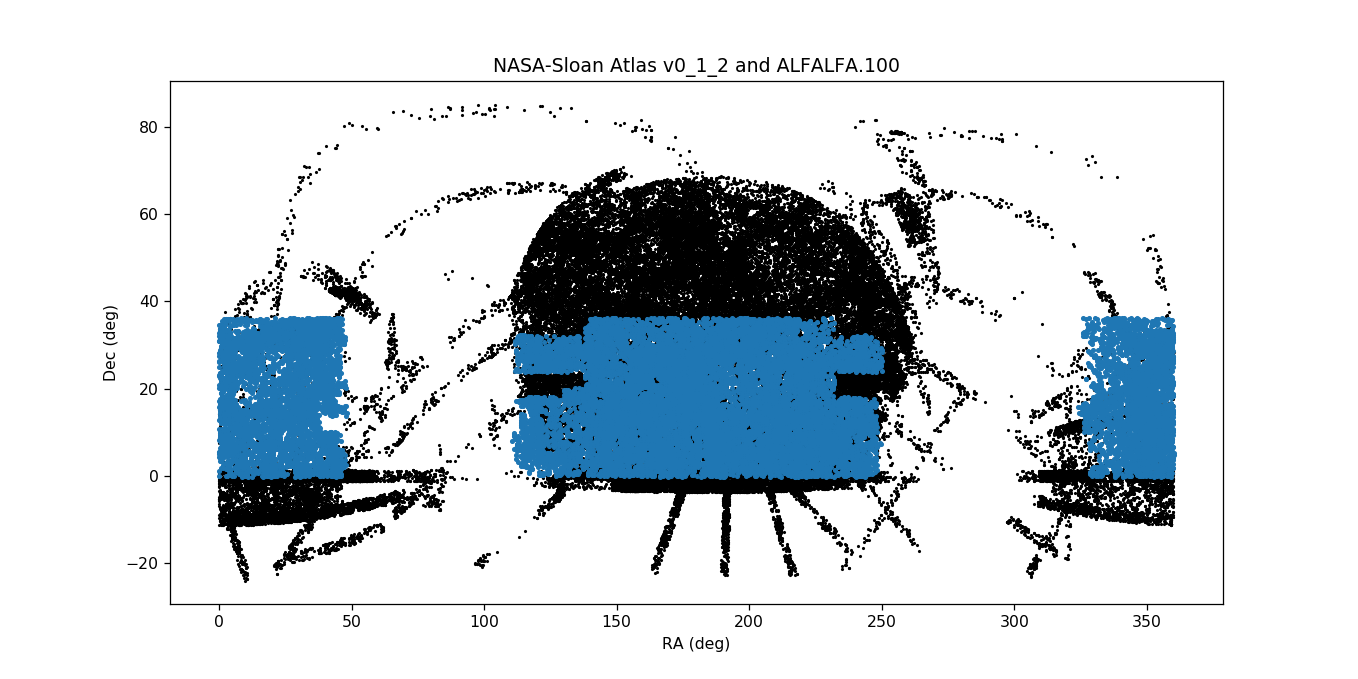

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.set_title('NASA-Sloan Atlas v0_1_2 and ALFALFA.100')
nsa[nsa.IALFALFA == -1].plot.scatter('RA', 'DEC', c='k', s=1, ax=ax)
alf[alf.HIcode == 1].plot.scatter('RAdeg_HI', 'DECdeg_HI', c='C0', s=5, ax=ax)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)');

## Where is xGASS?

In [12]:
xg = pd.read_csv('../../../alfalfa-convnets/data/xGASS_representative_sample.csv')
xg.sample(3)

,GASS,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,zSDSS,Dlum,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
279,109031,0,J092515.88+113548.7,1740,53050,528,141.316180,11.596880,0.011843,51.2,...,-1.145,-99.0,2.775,13774,1130676,0,3,0,0.0000,-99.000000
753,25347,230379,J133019.15+113042.5,1699,53148,152,202.579800,11.511810,0.037760,166.4,...,-1.848,-99.0,0.178,257207,1224457,1,1,0,12.7913,-4.031251
210,108064,4399,J082607.43+212724.1,1927,53321,554,126.530991,21.456709,0.014968,64.8,...,-0.082,0.0,2.343,82,1873986,0,70,0,13.9322,0.037653


<IPython.core.display.Javascript object>


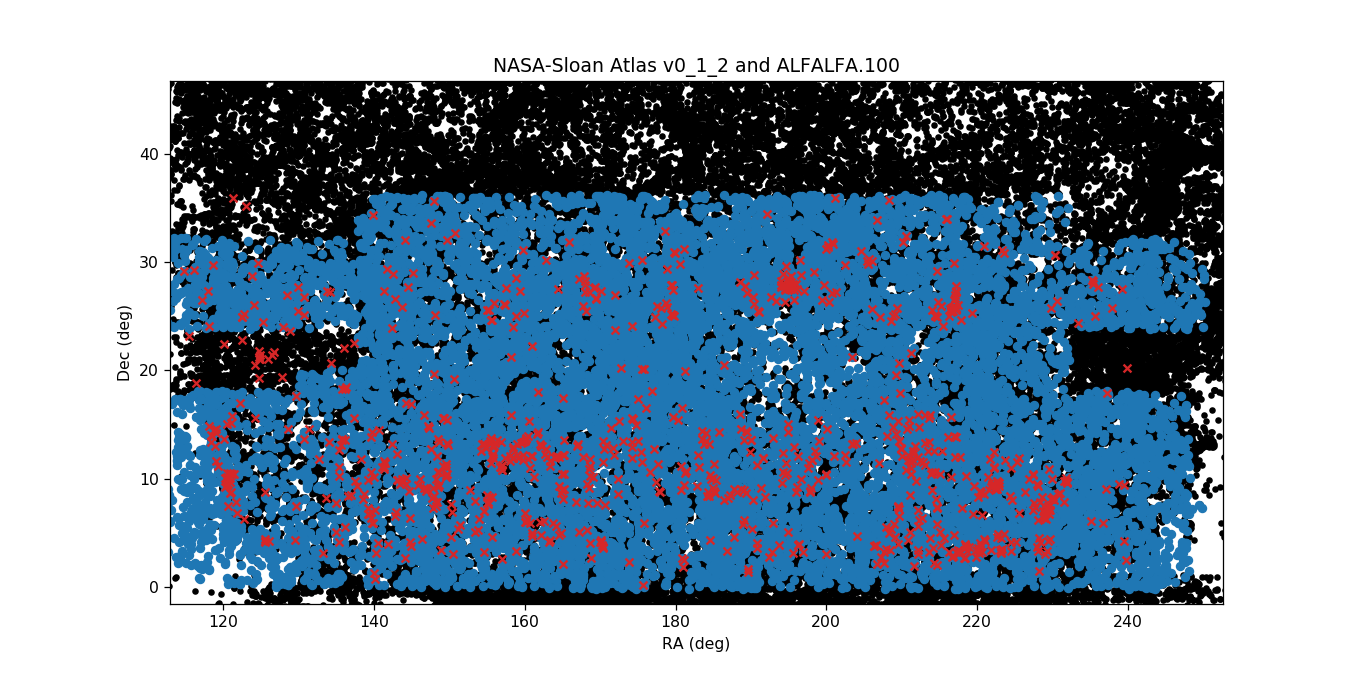

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.set_title('NASA-Sloan Atlas v0_1_2 and ALFALFA.100')
nsa[nsa.IALFALFA == -1].plot.scatter('RA', 'DEC', c='k', s=10, ax=ax)
alf[alf.HIcode == 1].plot.scatter('RAdeg_HI', 'DECdeg_HI', c='C0', s=25, ax=ax)
xg.plot.scatter('RA', 'DEC', c='C3', marker='x', s=25, ax=ax)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)');

## Approximate coordinates

We'll use `%maplotlib notebook` to try to isolate the "notch" coordinates

<IPython.core.display.Javascript object>


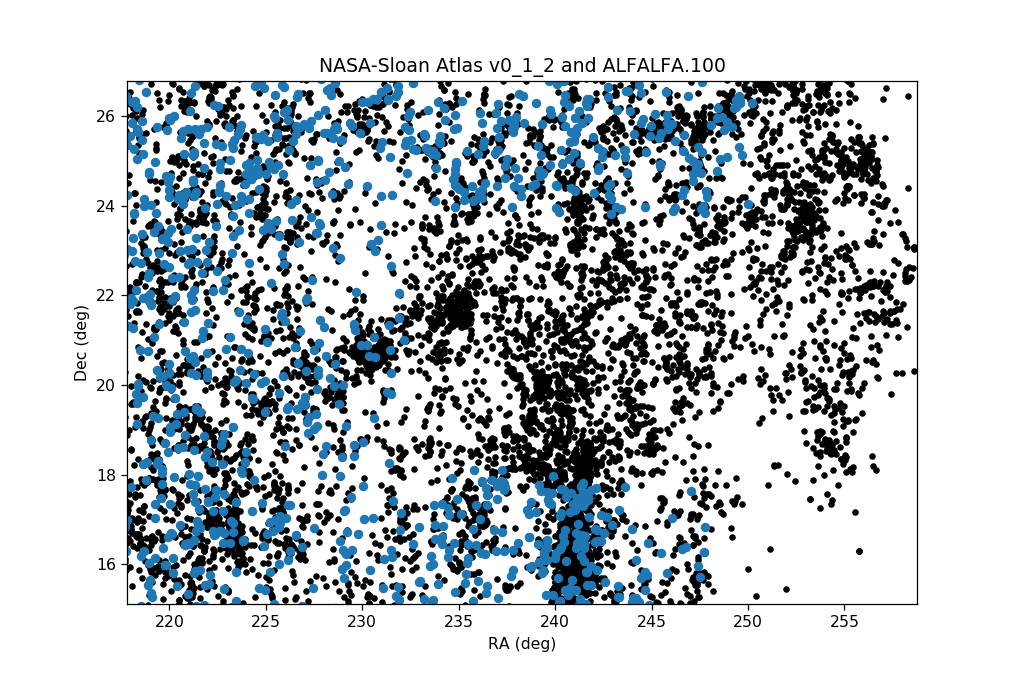

In [29]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot()

ax.set_title('NASA-Sloan Atlas v0_1_2 and ALFALFA.100')
nsa[nsa.IALFALFA == -1].plot.scatter('RA', 'DEC', c='k', s=10, ax=ax)
alf[alf.HIcode == 1].plot.scatter('RAdeg_HI', 'DECdeg_HI', c='C0', s=25, ax=ax)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)');

In [24]:
redshift_range = (0.01 < nsa.Z) & (nsa.Z < 0.05)

In [25]:
left_notch = ((112 < nsa.RA) & (nsa.RA < 130) & (18.2 < nsa.DEC) & (nsa.DEC < 23.8))
(left_notch & redshift_range).sum()

953

In [26]:
right_notch = ((232.2 < nsa.RA) & (nsa.RA < 250) & (18.1 < nsa.DEC) & (nsa.DEC < 23.8))
(right_notch & redshift_range).sum()

1747

<IPython.core.display.Javascript object>


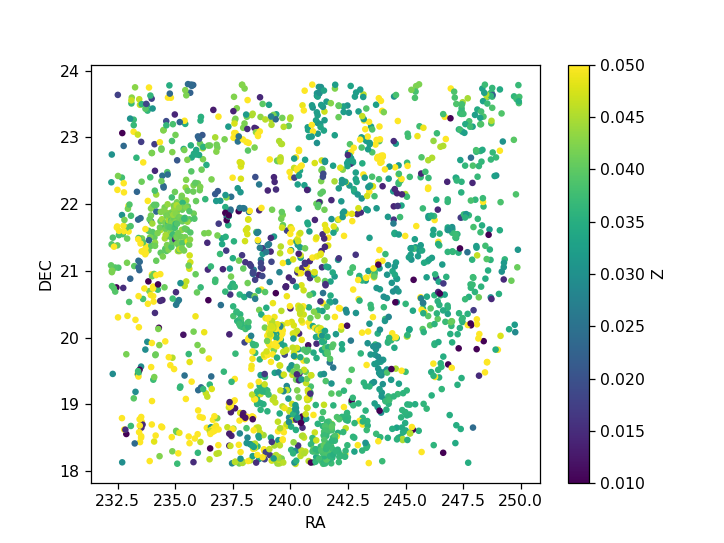

In [30]:
nsa[right_notch].plot.scatter('RA', 'DEC', c='Z', vmin=0.01, vmax=0.05, s=10, cmap='viridis')

Of note: there may be two clusters-- one around (235, 21.7) at z=0.04, and the other at (241, 18.5) at z=0.03 or so.

# Creating an ALFALFA non-detection catalog

Basically, let's make a cut in $r$ magnitude (SDSS DR7) and redshift using the ALFALFA catalog, and look for similarly distributed sources in NSA that have no detections.

In [23]:
%matplotlib inline

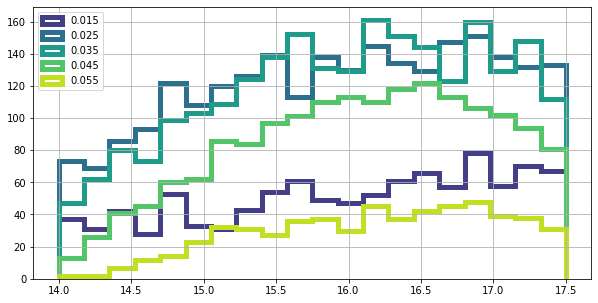

In [99]:
plt.figure(figsize=(10, 5))

a40_sdss = pd.read_csv(f'../../../alfalfa-convnets/data/a40.datafile3.csv')
for z in np.arange(0.01, 0.06, 0.01):
    a40_sdss[(z < a40_sdss.z_sdss) & (a40_sdss.z_sdss < z + 0.01)].rmodelmag.hist(bins=20, range=(14, 17.5), histtype='step', lw=5, label=f'{z+0.005:.3f}', color=plt.cm.viridis(z/.055))

plt.legend(loc='upper left')

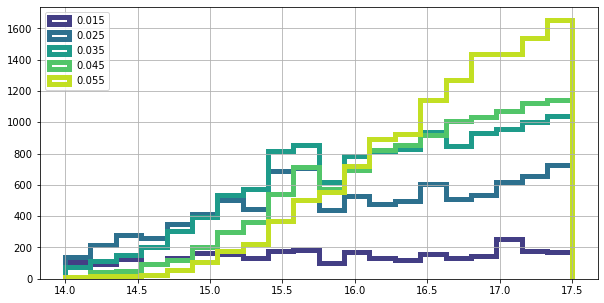

In [100]:
plt.figure(figsize=(10, 5))

for z in np.arange(0.01, 0.06, 0.01):
    nsa[(z < nsa.Z) & (nsa.Z < z+0.005)].MAG.hist(bins=20, range=(14, 17.5), histtype='step', lw=5, label=f'{z+0.005:.3f}', color=plt.cm.viridis(z/.055))
    
plt.legend(loc='upper left')

In [119]:
a40 = a40_sdss.join(alf, on='AGCNr', rsuffix='_',).set_index('AGCNr')

In [120]:
a40.shape

(12468, 26)

## Select $14 < r < 17$ and $0.01 < z < 0.05$

In [121]:
nsa_selection = (14 < nsa.MAG) & (nsa.MAG < 17.) & (0.01 < nsa.Z) & (nsa.Z < 0.05)
a40_selection = (14 < a40.rmodelmag) & (a40.rmodelmag < 17) & (0.01 < a40.z_sdss) & (a40.z_sdss < 0.05)

In [123]:
nsa[nsa_selection].shape, a40[a40_selection].shape

((58964, 5), (6279, 26))

In [124]:
nsa[nsa_selection].sample(3)

,RA,DEC,Z,IALFALFA,MAG
NSAID,,,,,
48467,168.367721,10.485972,0.029428,-1,14.793652
122751,215.914407,20.687150,0.048377,-1,16.377014
85287,145.088581,27.706358,0.028407,-1,15.739928


In [126]:
a40[a40_selection].sample(3)

,HIcode,OCcode,PhotoObjID,SpectObjID,rmodelmag,uminusr,z_sdss,z_err,Name,RAdeg_HI,...,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode_
AGCNr,,,,,,,,,,,,,,,,,,,,,
250071,1,I,587739630633287818,6.059655e+17,15.14,2.28,0.04558,0.00008,135-012.,226.55501,...,246.0,1.91,0.14,7.0,2.58,196.9,2.3,10.24,0.05,1.0
202182,1,I,587745402542882980,7.281269e+17,15.59,1.74,0.03088,0.00010,........,151.55418,...,517.0,1.86,0.09,11.4,2.14,136.9,2.4,9.91,0.05,1.0
210692,1,I,587738569773482180,4.959067e+17,14.92,2.06,0.03499,0.00008,097-103.,176.08250,...,407.0,1.38,0.08,9.6,1.95,154.7,2.2,9.89,0.05,1.0


## Impose positional constraint: let's go with 140 < $\alpha$ < 220, and  4 < $\delta$ < 16s

In [132]:
nsa_positional = (140 < nsa.RA) & (nsa.RA < 220) & (4 < nsa.DEC) & (nsa.DEC < 16)
a40_positional = (140 < a40.RAdeg_OC) & (a40.RAdeg_OC < 220) & (4 < a40.DECdeg_OC) & (a40.DECdeg_OC < 16)


In [134]:
nsa[nsa_selection & nsa_positional].shape, a40[a40_selection & a40_positional].shape

((5397, 5), (2662, 26))

In [135]:
(nsa[nsa_selection & nsa_positional].sample(2662, replace=False)
 .to_csv(
    f'../../results/nsa_nondetections.csv', 
    columns=['RA', 'DEC', 'Z', 'MAG'],
    header=['ra', 'dec', 'z', 'r'],
    index=True
))

In [136]:
a40[a40_selection & a40_positional].to_csv(
    f'../../results/a40_detections.csv',
    columns=['RAdeg_OC', 'DECdeg_OC', 'z_sdss', 'rmodelmag'],
    header=['ra', 'dec', 'z', 'r'],
    index=True
)